<a href="https://colab.research.google.com/github/avikagupta03/VectorBasedFraudDetection/blob/main/VectorBasedFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

avikagupta0312_fake_call_path = kagglehub.dataset_download('avikagupta0312/fake-call')

print('Data source import complete.')


In [ ]:
import pandas as pd
file_path = '/kaggle/input/fake-call/fakecall.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

    fraud  \
0   fraud   
1  normal   
2  normal   
3  normal   
4  normal   

  hello, i m bank manager of SBI, ur debit card is about to expire would u want to issue new  card.  
0  Todays Vodafone numbers ending with 4882 are s...                                                 
1               Please don't say like that. Hi hi hi                                                 
2                                         Thank you!                                                 
3  Oh that was a forwarded message. I thought you...                                                 
4  Got it. Seventeen pounds for seven hundred ml ...                                                 


In [ ]:
df.columns = ['class', 'message']

In [ ]:
(df["class"])


0        fraud
1       normal
2       normal
3       normal
4       normal
         ...  
5919     fraud
5920     fraud
5921     fraud
5922     fraud
5923     fraud
Name: class, Length: 5924, dtype: object


In [ ]:
dataset_length = len(df)
print(dataset_length)

5924


In [ ]:
class_counts = df['class'].value_counts()
class_proportions = df['class'].value_counts(normalize=True)

In [ ]:
print("\nClass Counts:")
print(class_counts)


Class Counts:
class
normal    5287
fraud      637
Name: count, dtype: int64


In [ ]:
print("\nClass Proportions:")
print(class_proportions)


Class Proportions:
class
normal    0.892471
fraud     0.107529
Name: proportion, dtype: float64


In [ ]:
# Check for imbalance (adjust threshold as needed)
imbalance_threshold = 0.2
is_imbalanced = any(class_proportions < imbalance_threshold)
print("\nIs the dataset imbalanced?", is_imbalanced)


Is the dataset imbalanced? True


In [ ]:
!pip install imbalanced-learn


In [ ]:
df['class'] = df['class'].map({'normal': 0, 'fraud': 1})

# Features (X) and Target (y)
X = df['message']
y = df['class']

In [ ]:
print(y)

0       1
1       0
2       0
3       0
4       0
       ..
5919    1
5920    1
5921    1
5922    1
5923    1
Name: class, Length: 5924, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000,stop_words='english')  # You can adjust max_features
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9831223628691983
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1059
           1       0.99      0.85      0.91       126

    accuracy                           0.98      1185
   macro avg       0.99      0.92      0.95      1185
weighted avg       0.98      0.98      0.98      1185



In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9763713080168777
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1059
           1       0.99      0.79      0.88       126

    accuracy                           0.98      1185
   macro avg       0.98      0.89      0.93      1185
weighted avg       0.98      0.98      0.98      1185



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.979746835443038
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1059
           1       0.98      0.83      0.90       126

    accuracy                           0.98      1185
   macro avg       0.98      0.91      0.94      1185
weighted avg       0.98      0.98      0.98      1185



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier
xgboost_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9780590717299578
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1059
           1       0.96      0.83      0.89       126

    accuracy                           0.98      1185
   macro avg       0.97      0.91      0.94      1185
weighted avg       0.98      0.98      0.98      1185



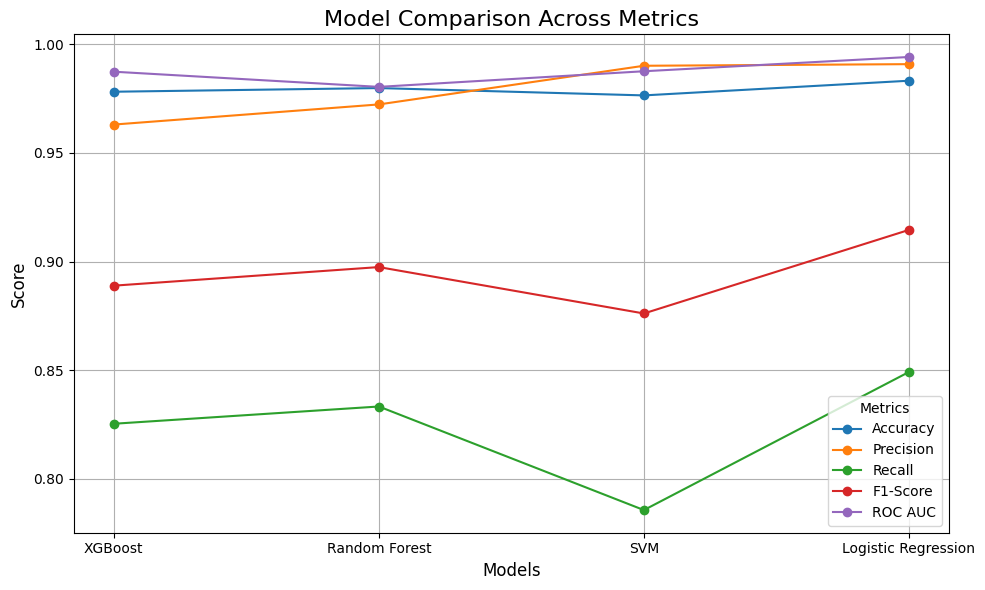

In [ ]:
# Convert metrics dictionary into a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics, index=models.keys())

# Plotting the results as linear graphs
plt.figure(figsize=(10, 6))

# Plot each metric as a line
for metric in metrics_df.columns:
    plt.plot(metrics_df.index, metrics_df[metric], marker='o', label=metric)

# Add titles and labels
plt.title('Model Comparison Across Metrics', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(title='Metrics', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Debugging dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Model Training and Evaluation
models = {
    'XGBoost': xgb.XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]  # For AUC
    y_pred = model.predict(X_test)
    print(f"{model_name} - Accuracy: {accuracy_score(y_test, y_pred)}")


X_train shape: (4739, 7467)
X_test shape: (1185, 7467)
XGBoost - Accuracy: 0.9780590717299578
Random Forest - Accuracy: 0.9755274261603376
SVM - Accuracy: 0.979746835443038
Logistic Regression - Accuracy: 0.9831223628691983


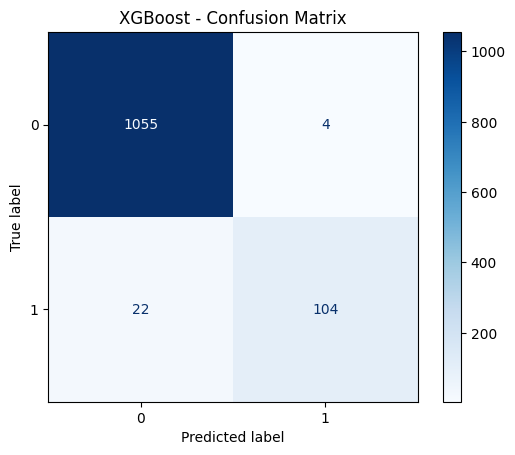

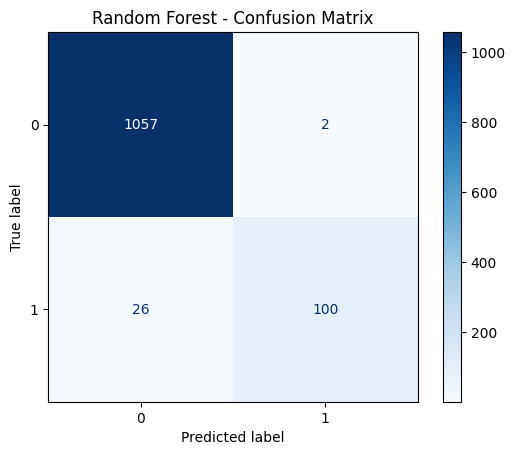

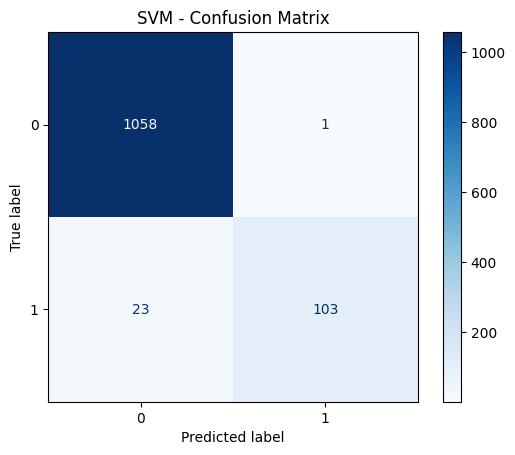

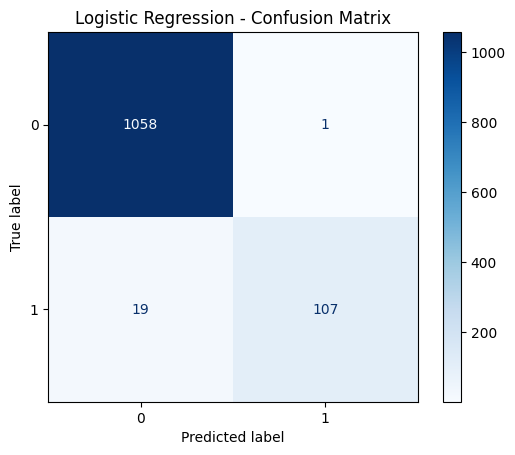

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model_name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


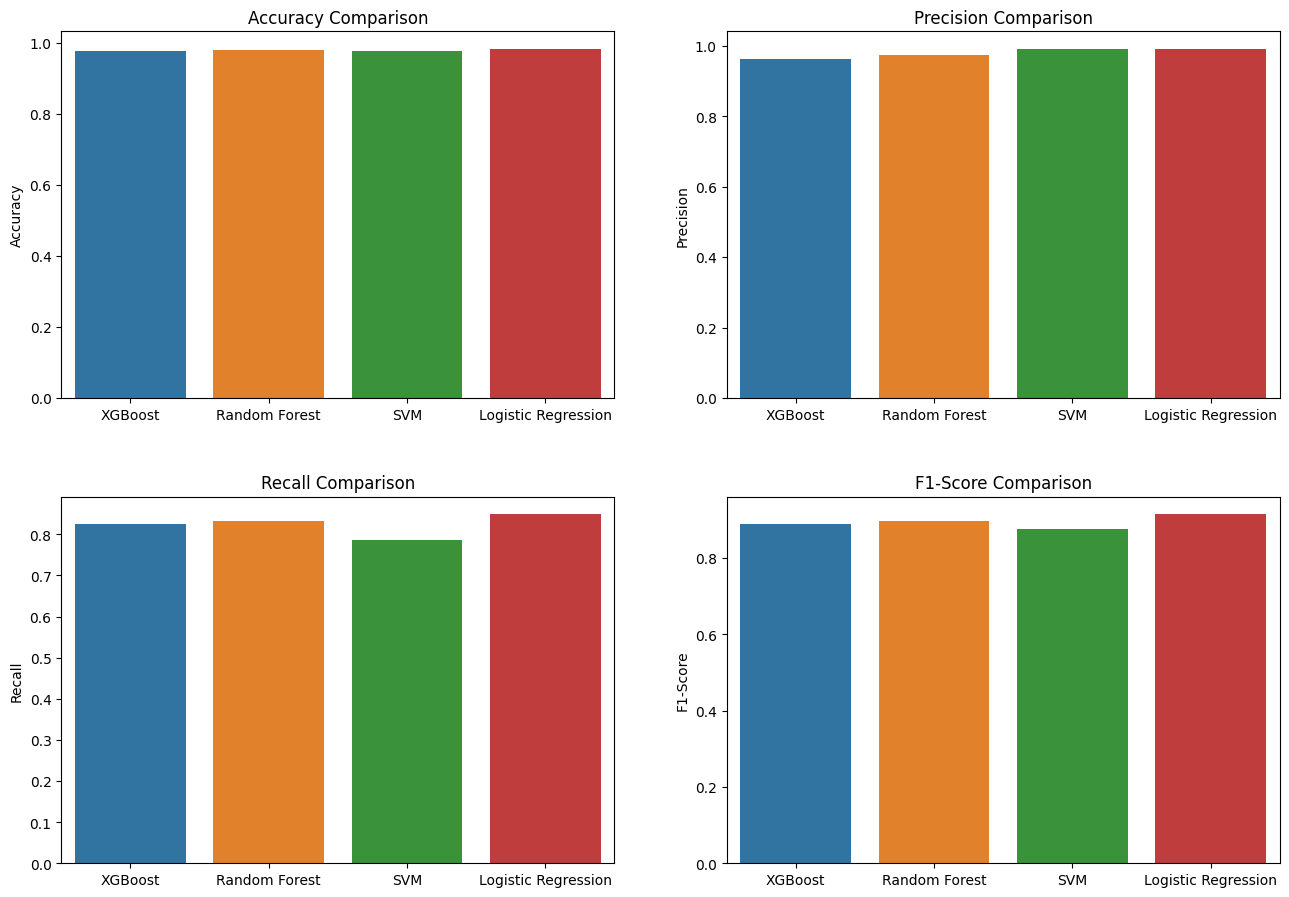

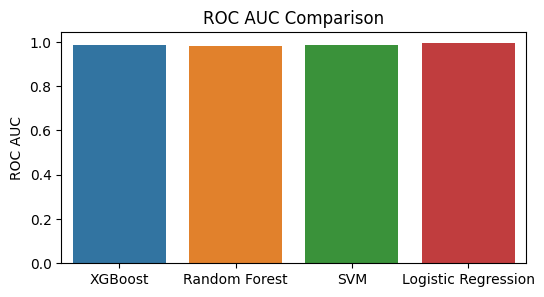

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
models = {
    'XGBoost': xgb.XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
}

# Initialize metrics dictionary
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

# Train each model, make predictions, and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store the results
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)
    metrics['ROC AUC'].append(roc_auc)

# Create DataFrame for visualization
metrics_df = pd.DataFrame(metrics, index=models.keys())

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.tight_layout(pad=5)

# Accuracy Plot
sns.barplot(x=metrics_df.index, y=metrics_df['Accuracy'], ax=axes[0, 0])
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')

# Precision Plot
sns.barplot(x=metrics_df.index, y=metrics_df['Precision'], ax=axes[0, 1])
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')

# Recall Plot
sns.barplot(x=metrics_df.index, y=metrics_df['Recall'], ax=axes[1, 0])
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylabel('Recall')

# F1-Score Plot
sns.barplot(x=metrics_df.index, y=metrics_df['F1-Score'], ax=axes[1, 1])
axes[1, 1].set_title('F1-Score Comparison')
axes[1, 1].set_ylabel('F1-Score')

# Show the plots
plt.show()

# ROC AUC Plot (this could be plotted separately)
plt.figure(figsize=(6, 3))
sns.barplot(x=metrics_df.index, y=metrics_df['ROC AUC'])
plt.title('ROC AUC Comparison')
plt.ylabel('ROC AUC')
plt.show()


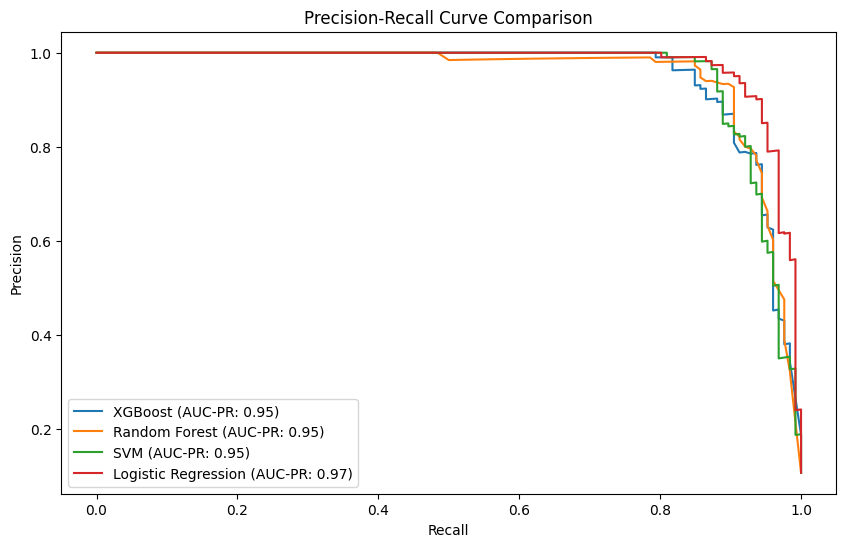

In [ ]:
from sklearn.metrics import average_precision_score

plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auc_pr = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name} (AUC-PR: {auc_pr:.2f})")
plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('/kaggle/input/fake-call/fakecall.csv')

# Renaming columns for clarity
df.columns = ['class', 'message']

# Preprocess the data
X = df['message']  # Text data
y = df['class']  # Target labels

# Convert labels into binary (1 for fraud, 0 for normal)
y = y.map({'fraud': 1, 'normal': 0})

# Feature extraction using CountVectorizer (or you can use TF-IDF)
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train models
models = {
    'SVM': SVC(kernel='linear'),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model_name} - Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'{model_name} - Classification Report:')
    print(classification_report(y_test, y_pred))

# User input for prediction function
def predict_fraud_or_normal(user_input, model, vectorizer):
    user_input_vectorized = vectorizer.transform([user_input])
    prediction = model.predict(user_input_vectorized)
    return 'fraud' if prediction == 1 else 'normal'

# Infinite loop for user input classification
while True:
    user_input = input("Please enter the message to classify as fraud or normal (or type 'exit' to quit): ")

    if user_input.lower() == 'exit':
        print("Exiting the classification program.")
        break

    # Predict with each model
    for model_name, model in models.items():
        result = predict_fraud_or_normal(user_input, model, vectorizer)
        print(f"Model: {model_name} - The input message is classified as: {result}")


SVM - Accuracy: 0.9814345991561182
SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1059
           1       0.98      0.84      0.91       126

    accuracy                           0.98      1185
   macro avg       0.98      0.92      0.95      1185
weighted avg       0.98      0.98      0.98      1185

Logistic Regression - Accuracy: 0.9831223628691983
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1059
           1       0.99      0.85      0.91       126

    accuracy                           0.98      1185
   macro avg       0.99      0.92      0.95      1185
weighted avg       0.98      0.98      0.98      1185

Random Forest - Accuracy: 0.9755274261603376
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    

Please enter the message to classify as fraud or normal (or type 'exit' to quit):  "Dear customer, your account has been compromised. Please provide your personal details (including your full name, credit card number, and PIN) to verify your identity and avoid further action. Failure to do so may result in your account being suspended immediately."


Model: SVM - The input message is classified as: fraud
Model: Logistic Regression - The input message is classified as: fraud
Model: Random Forest - The input message is classified as: normal
Model: XGBoost - The input message is classified as: fraud


Please enter the message to classify as fraud or normal (or type 'exit' to quit):  hi


Model: SVM - The input message is classified as: normal
Model: Logistic Regression - The input message is classified as: normal
Model: Random Forest - The input message is classified as: normal
Model: XGBoost - The input message is classified as: normal


Please enter the message to classify as fraud or normal (or type 'exit' to quit):  Your account has been compromised. To restore access, click on the link and enter your username, password, and recent transactions to confirm your identity


Model: SVM - The input message is classified as: normal
Model: Logistic Regression - The input message is classified as: normal
Model: Random Forest - The input message is classified as: normal
Model: XGBoost - The input message is classified as: normal


Please enter the message to classify as fraud or normal (or type 'exit' to quit):  Suspicious activity detected: Someone tried to log into your account from a new device. Please verify your account by providing your phone number, date of birth, and address within 24 hours to avoid a permanent lock.


Model: SVM - The input message is classified as: fraud
Model: Logistic Regression - The input message is classified as: fraud
Model: Random Forest - The input message is classified as: normal
Model: XGBoost - The input message is classified as: fraud


Please enter the message to classify as fraud or normal (or type 'exit' to quit):  "URGENT: Your account has been flagged for suspicious activity. Please log in immediately using the link below to verify your account. Failure to do so may result in account suspension.


Model: SVM - The input message is classified as: fraud
Model: Logistic Regression - The input message is classified as: fraud
Model: Random Forest - The input message is classified as: normal
Model: XGBoost - The input message is classified as: fraud


Please enter the message to classify as fraud or normal (or type 'exit' to quit):  bye


Model: SVM - The input message is classified as: normal
Model: Logistic Regression - The input message is classified as: normal
Model: Random Forest - The input message is classified as: normal
Model: XGBoost - The input message is classified as: normal


Please enter the message to classify as fraud or normal (or type 'exit' to quit):  good


Model: SVM - The input message is classified as: normal
Model: Logistic Regression - The input message is classified as: normal
Model: Random Forest - The input message is classified as: normal
Model: XGBoost - The input message is classified as: normal


Please enter the message to classify as fraud or normal (or type 'exit' to quit):  exit


Exiting the classification program.
